# Part II - Loan Data Exploration
## by Eniola Ogunmona

## Investigation Overview


In this investigation, I am interested in the factors that affect a loan’s outcome status. The main focus was on the original amount of the loan, borrower rate, monthly loan payment, range of income and credit grade


## Dataset Overview

The data set contains 113,937 loans with 81 variables on each loan, including loan amount, interest rate, current loan status, borrower income.

In [1]:

# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv("prosperLoanData.csv")

In [3]:
# Convert the "IncomeRange" and "CreditGrade" column from a plain object type into an ordered categorical type 
# List of ratings
ordinal_var_dict = {"IncomeRange": ['$0', "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", 
                "$100,000+", "Not employed", "Not displayed"],
                    "CreditGrade": ["AA", "A", "B", "C", "D", "E", "HR", "NC"]}
# Returns the types with the categories & orderedness and uses pandas.astype() to convert 
# from a plain object type into an ordered categorical type 
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    loan_df[var] = loan_df[var].astype(ordered_var)

loan_df["LoanStatus"] = loan_df["LoanStatus"].apply(lambda x: "".join(x.split()[:2]))



## Distribution of Loan Status

Most of the loans are currently running and completed. We have a few loans that are charged off, defaulted, past due, cancelled or final payment been made. 

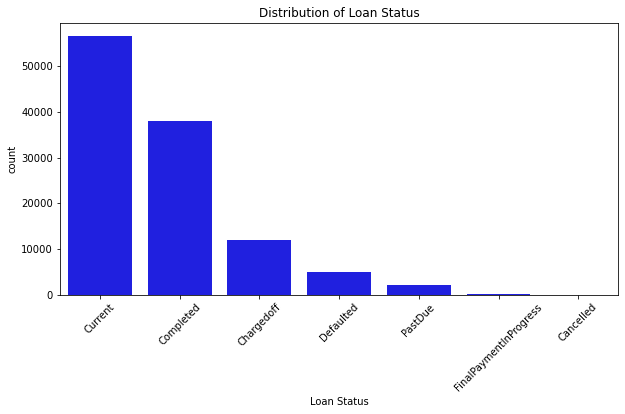

In [4]:
plt.figure(figsize=(10,5))
order = loan_df.LoanStatus.value_counts().index
sb.countplot(data=loan_df, x="LoanStatus", color="blue", order=order)
plt.xticks(rotation=45)
plt.title("Distribution of Loan Status")
plt.xlabel("Loan Status");

## Distribution of Loan Original Amount

Most of the loan taken fall a little below 5000. Loan original amount is a discrete variable and is plotted on a logarithmic scale, adding gaps between bars helps to emphasize its discretness. It is unimodal and has a long tailed distribution with lot of the amount on the low end.


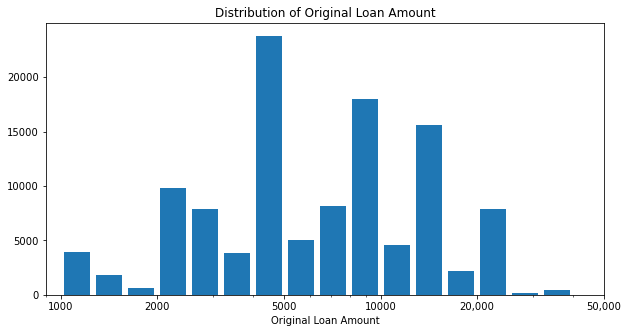

In [5]:
# Plotting a histogram using log scale
plt.figure(figsize=[10, 5])
bins = 10 ** np.arange(3, 5+0.3, 0.1)
plt.hist(data=loan_df, x="LoanOriginalAmount", bins=bins, rwidth = 0.8)
plt.xscale("log")
plt.xlim(900,4e4)
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 5e4], ['1000', '2000', '5000', '10000', "20,000", "50,000"])
plt.title("Distribution of Original Loan Amount")
plt.xlabel("Original Loan Amount");

## Distribution of Borrower Rate

The borrower (interest) rate charged is between 0-0.5. The distribution of borrower rate is right skewed and unimodal in nature

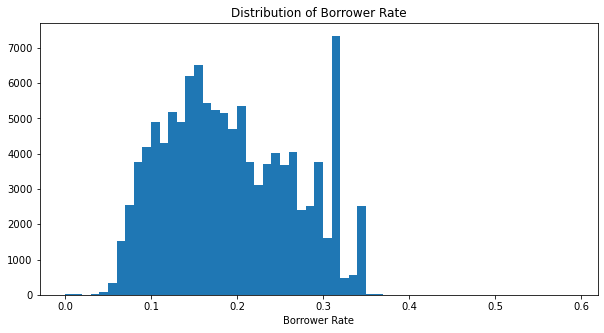

In [6]:
# setting a larger figure size for subplots and smaller bin sizes
plt.figure(figsize = [10,5])

bins = np.arange(0, loan_df["BorrowerRate"].max()+0.1, 0.01)
plt.hist(data=loan_df, x="BorrowerRate", bins=bins);
plt.title("Distribution of Borrower Rate")
plt.xlabel("Borrower Rate");


## Borrower rate vs. Loan Original Amount

There is a negative relationship between loan original amount and borrower rate. The original amount borrowed are mostly low range between 1000 - 12000 with interest rates between 0.1 - 0.35

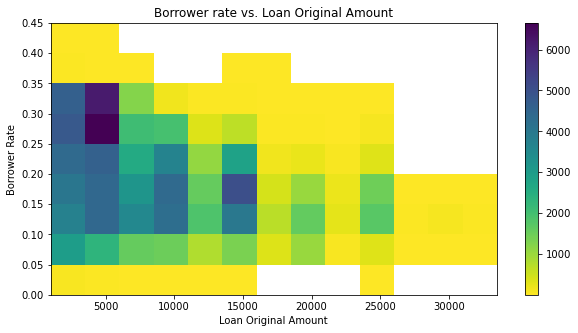

In [7]:
# Using a heat map to see the relationship between original amount of loan and interest rate
plt.figure(figsize = [10,5])

# Specifying bin edges 
bins_x = np.arange(1000, 35000+1000, 2500) 
bins_y = np.arange(0, 0.5, 0.05)

plt.hist2d(data=loan_df, x="LoanOriginalAmount", y="BorrowerRate", cmin=0.55, cmap="viridis_r", bins = [bins_x, bins_y])
plt.colorbar()
plt.title("Borrower rate vs. Loan Original Amount")
plt.xlabel("Loan Original Amount")
plt.ylabel("Borrower Rate");

## Monthly Loan Payment vs. Loan Original Amount

Monthly loan payment and the original amount of the loan have a positive relationship which means the higher the loan taken the higher monthly payment made on the loan. This is actually expected, the relationship is seen clearer on a logarithmic scale.

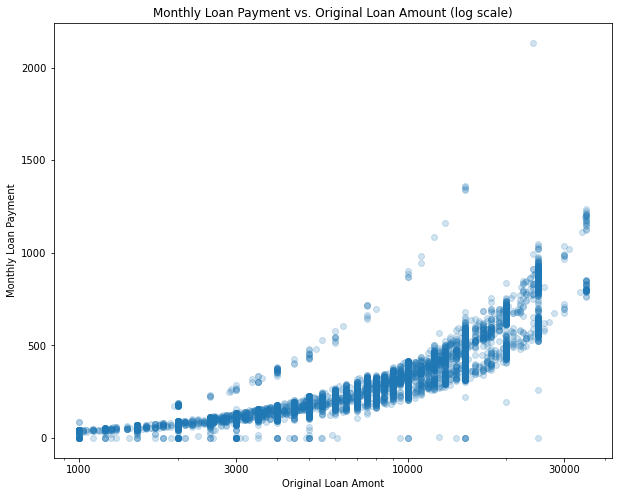

In [8]:
# Taking a random sample of 10000 data points
samples = np.random.choice(loan_df.shape[0], 10000, replace = False)
loan_samp = loan_df.loc[samples,:]

# Let's see the relationship on a scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data=loan_samp, x="LoanOriginalAmount", y="MonthlyLoanPayment", alpha = 0.2)
plt.xscale("log")
plt.xticks([1e3, 3e3, 1e4, 3e4], ['1000', '3000', '10000', '30000'])
plt.title("Monthly Loan Payment vs. Original Loan Amount (log scale)")
plt.xlabel("Original Loan Amont")
plt.ylabel("Monthly Loan Payment");

## Distribution of Loan Status, Income Range and Credit Grade against Loan Original Amount

For `loan status`, there are low frequently occuring values for the different category and loan original amount,there is an exception in the cancelled category which has a wider PDF with most of the values occuring between 0 - 5000, this could imply that lower amount of loans taken are more likely to get cancelled.

The plot for `credit grade` shows extremely narrow PDF for ratings AA - B, narrow PDF for C and D then a wider PDF for E - NC. This could mean those with ratings AA - B don't have a limit to the amount of loan that can be granted, ratings C and D have limited opportunity to access high loan amount and E - NC mostly get considered for lower sum of loans.

Looking at the `income range` relating to the loan original amount, we can see more frequency in loans taken by those with low income ranges from \\$0 - \\$49999 and those who are not employed or didn't disclose income info, these category have 75% of loans taken less than 10000.
Those with income ranges \\$50000 to over \\$100000 have low frequency in taking loans have median loans taken less than 10000.

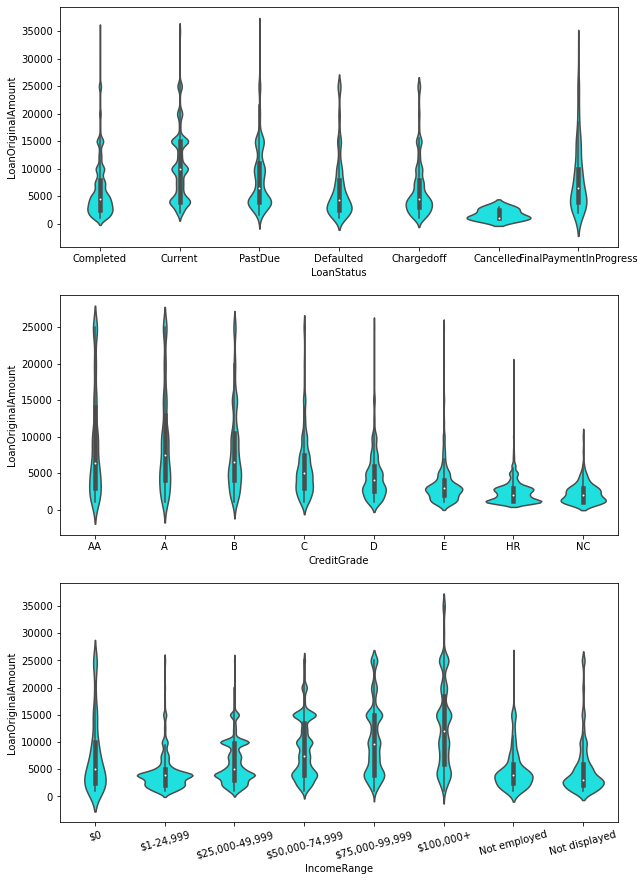

In [9]:
fig, ax = plt.subplots(nrows=3, figsize = [10, 15])

default_color = "cyan"
sb.violinplot(data=loan_df, x="LoanStatus", y="LoanOriginalAmount", color=default_color, ax = ax[0])
sb.violinplot(data=loan_df, x="CreditGrade", y="LoanOriginalAmount", color=default_color, ax = ax[1])
sb.violinplot(data=loan_df, x="IncomeRange", y="LoanOriginalAmount", color=default_color,  ax = ax[2])
plt.xticks(rotation=15)
plt.show()

## Relationship between Credit Grade and Loan Status on Loan Original Amount

* Across all ratings there are loans with completed status though the average amount completed gets lower as the ratings reduce. 
* The defaulted loan status is seen across all ratings, but there fewer loans in ratings AA-C
* The chargedoff loan status (this means loan written of as bad debt) is predominant across all ratings, ratings AA-B have fewer loans of that status.
* The cancelled loan status is seen in the A, C and HR rating for very low loan amounts, the error bars in rating HR mean there is fewer loan amount of that status.

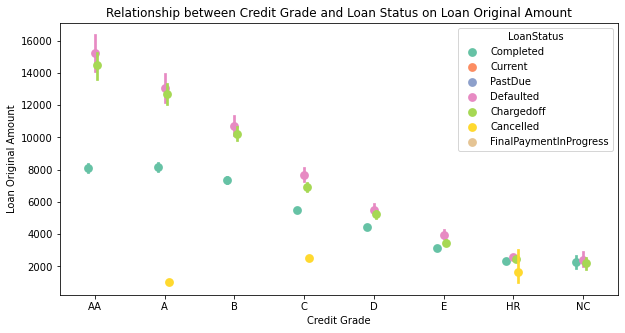

In [10]:
plt.figure(figsize=(10,5))
sb.pointplot(data=loan_df, x="CreditGrade", y="LoanOriginalAmount", hue="LoanStatus", palette = "Set2", linestyles = "", 
             dodge=0.2)
plt.title("Relationship between Credit Grade and Loan Status on Loan Original Amount")
plt.xlabel("Credit Grade")
plt.ylabel("Loan Original Amount");

In [11]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

^C
